First 5 rows of the dataset:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49   

/tmp/ipykernel_7954/2639142821.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


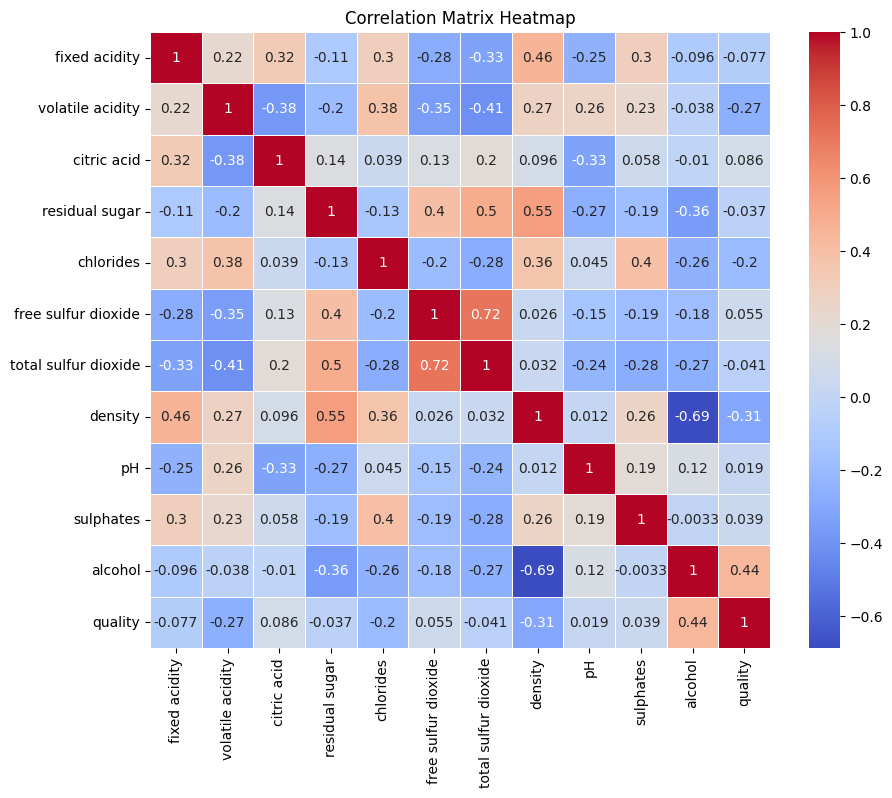

KeyError: 'target_column'

<Figure size 1000x600 with 0 Axes>

In [7]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Wine_Quality.csv'  # Use the correct path for the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset (columns, non-null values, data types)
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize distribution of a target variable (replace 'target_column' with actual column)
plt.figure(figsize=(10, 6))
sns.histplot(df['target_column'], bins=20, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

# Boxplot for visualizing the distribution of variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot for All Variables')
plt.show()

# Check the number of unique values in each column
print("\nUnique values in each column:")
print(df.nunique())

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Check for outliers in the data using box plots (for each numerical column)
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualizing relationships between pairs of important variables (you can modify)
# sns.lmplot(x='column1', y='target_column', data=df)  # Replace 'column1' and 'target_column' as needed
# plt.title('Relationship between column1 and target_column')
# plt.show()


In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (update the path to your dataset)
temp_data = pd.read_csv('Wine_Quality.csv')

# Display the first few rows of the dataset
print(temp_data.head())

# Assuming your DataFrame is named 'df'
data= temp_data.dropna()

# If you want to modify the original DataFrame instead of creating a new one:
# df.dropna(inplace=True)

# To see how many rows were removed:
print(f"Original shape: {temp_data.shape}")
print(f"New shape: {data.shape}")

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [9]:
# Encode 'type' column to numerical (0: white, 1: red)
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Split the dataset into features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/tmp/ipykernel_7954/1367182504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = label_encoder.fit_transform(data['type'])


In [10]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f'Training MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Training R2: {r2_train}, Test R2: {r2_test}')


Training MSE: 0.5403691767621274, Test MSE: 0.5178363563772256
Training R2: 0.2842948586298424, Test R2: 0.34647498390395925


In [14]:
# Function to predict wine quality based on user input
def predict_wine_quality(model, scaler):
    # Accepting inputs from the user
    print("Enter wine features to predict quality:")
    
    wine_type = input("Wine Type (0 for white, 1 for red): ")
    fixed_acidity = float(input("Fixed Acidity: "))
    volatile_acidity = float(input("Volatile Acidity: "))
    citric_acid = float(input("Citric Acid: "))
    residual_sugar = float(input("Residual Sugar: "))
    chlorides = float(input("Chlorides: "))
    free_sulfur_dioxide = float(input("Free Sulfur Dioxide: "))
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))
    density = float(input("Density: "))
    pH = float(input("pH: "))
    sulphates = float(input("Sulphates: "))
    alcohol = float(input("Alcohol: "))
    
    # Create a dataframe for user input
    input_data = pd.DataFrame({
        'type': [int(wine_type)],
        'fixed acidity': [fixed_acidity],
        'volatile acidity': [volatile_acidity],
        'citric acid': [citric_acid],
        'residual sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free sulfur dioxide': [free_sulfur_dioxide],
        'total sulfur dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    
    # Scale the input data to match the trained model
    input_scaled = scaler.transform(input_data)
    
    # Predict the wine quality
    quality_pred = model.predict(input_scaled)
    
    print(f"Predicted Wine Quality: {round(quality_pred[0], 2)}")
    return quality_pred

# Use this function after training your model and scaler
predict_wine_quality(model, scaler)


Enter wine features to predict quality:


Wine Type (0 for white, 1 for red):  0
Fixed Acidity:  6.7
Volatile Acidity:  0.13
Citric Acid:  0.29
Residual Sugar:  5.3
Chlorides:  0.051
Free Sulfur Dioxide:  31
Total Sulfur Dioxide:  122
Density:  0.9944
pH:  3.44
Sulphates:  0.37
Alcohol:  9.7


Predicted Wine Quality: 6.24


array([6.24352929])